In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

df = pd.read_csv("game_data.csv")

In [3]:
new_list = []
for i, row in df.iterrows():
    date = row[0]
    data = json.loads(row["game_data"])
    for row in data:
        row["date"] = date
    new_list += data
games = pd.DataFrame(new_list)

In [4]:
games.isna().mean()

winner_id       0.000000
loser_id        0.000000
winner_score    0.946067
loser_score     0.476447
winner_char     0.010906
loser_char      0.011759
stage           0.481110
date            0.000000
dtype: float64

We're most interested in which characters won or lost. This data is missing in about 1% of rows so we can safely drop those as they make up only a very small minority of data points.

In [5]:
games.dropna(subset=["winner_char", "loser_char"], inplace=True)

Cleaning the strings to remove the "ultimate/" tag at the beginnings of the characters' names.

In [6]:

games["winner_char"] = games["winner_char"].apply(lambda x: x[9:])
games["loser_char"] = games["loser_char"].apply(lambda x: x[9:])

## Question 1: What character should I pick?

In [7]:
wins_per_char = games["winner_char"].value_counts()

In [8]:
top_chars = wins_per_char[:20]

Most wins by absolute value

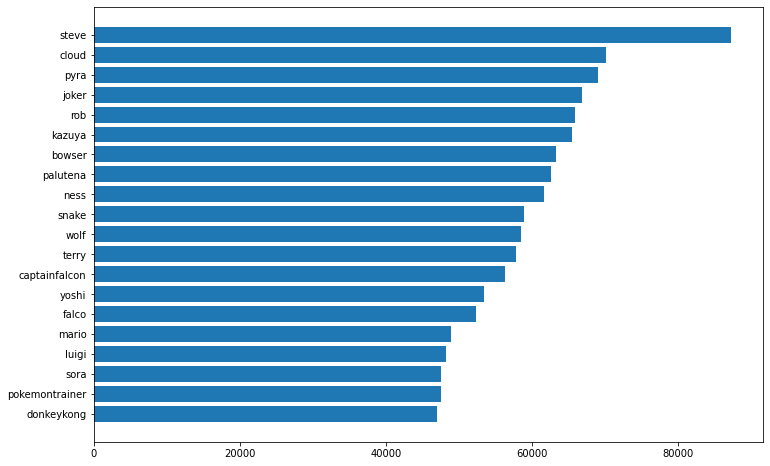

In [9]:
plt.figure(figsize=(12,8))
plt.barh(top_chars.index[::-1], top_chars[::-1], );

<AxesSubplot:>

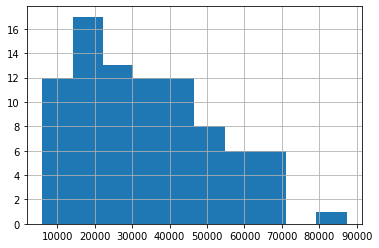

In [10]:
wins_per_char.hist()

In [11]:
char_played = games["winner_char"].value_counts() + games["loser_char"].value_counts()
char_played

banjokazooie      51530
bayonetta         69178
bowser           129348
bowserjr          43233
byleth           101649
                  ...  
wolf             122164
yoshi            107138
younglink         57579
zelda             61082
zerosuitsamus     60362
Length: 87, dtype: int64

### Most popular character?

In [12]:
char_played.sort_values(ascending=False)[:10]

joker       150758
pyra        149999
cloud       149281
steve       149248
bowser      129348
wolf        122164
kazuya      121823
rob         119924
ness        119622
palutena    118819
dtype: int64

<AxesSubplot:>

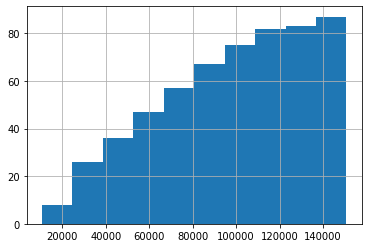

In [13]:
char_played.hist(cumulative=True)

There's clearly only a small-ish subset of characters who are popular (most characters are grouped towards the bottom of the histogram). Each step gets smaller as we go towards the right meaning that fewer characters account for more matches.

### Characters with the highest win ratio

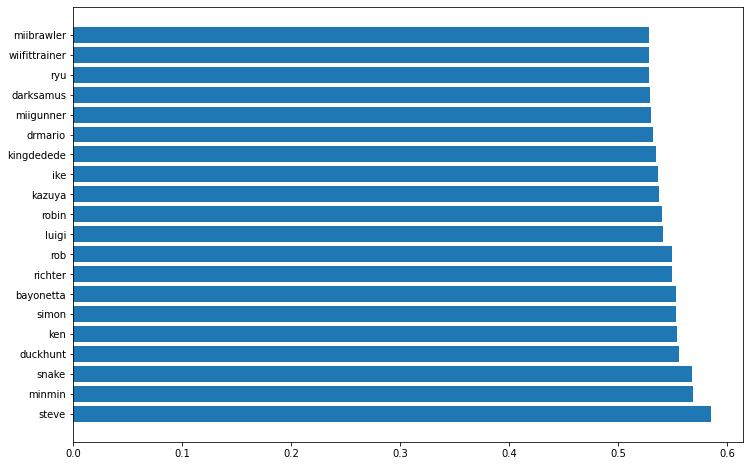

In [14]:
win_ratio = wins_per_char / char_played

top_20 = win_ratio.sort_values(ascending=False)[:20]
plt.figure(figsize=(12,8))
plt.barh(top_20.index, top_20);

All of these characters have a higher than average win ratio, suggesting that generally they are better in a variety of matchups.

In [15]:
combined = pd.concat([char_played, wins_per_char, win_ratio], axis=1)
combined.columns = ["Appearances", "Wins", "Win Ratio"]
condition = (combined["Win Ratio"] > combined["Win Ratio"].mean())
combined[condition].sort_values("Win Ratio", ascending=False)

,Appearances,Wins,Win Ratio
steve,149248,87281,0.584805
minmin,77044,43825,0.568831
snake,103612,58852,0.568004
duckhunt,34011,18896,0.555585
ken,39637,21957,0.553952
simon,10706,5924,0.553335
bayonetta,69178,38241,0.552791
richter,21027,11557,0.549627
rob,119924,65832,0.548948
luigi,89147,48246,0.541196


It seems some unpopular characters have a relatively high win ratio. Probably since they're underrepresented in tournaments, there's not really enough high-level matches to produce a decent ratio. Only account for more popular characters instead

In [16]:
condition = (combined["Win Ratio"] > combined["Win Ratio"].mean()) & (combined["Appearances"] > 50000)
combined[condition].sort_values("Win Ratio", ascending=False)

,Appearances,Wins,Win Ratio
steve,149248,87281,0.584805
minmin,77044,43825,0.568831
snake,103612,58852,0.568004
bayonetta,69178,38241,0.552791
rob,119924,65832,0.548948
luigi,89147,48246,0.541196
robin,50447,27248,0.540131
kazuya,121823,65466,0.537386
ike,62335,33416,0.536071
kingdedede,85786,45831,0.534248


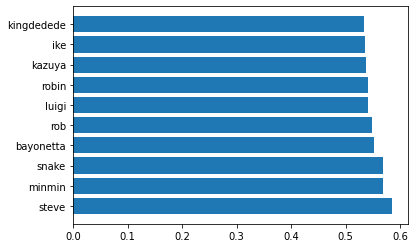

In [17]:
top_ten = combined[condition].sort_values("Win Ratio", ascending=False)[:10]
plt.barh(top_ten.index, top_ten["Win Ratio"]);

### Is the game "balanced"? Do characters have a similar chance of winning?

In [18]:
win_ratio.mean()

0.500390184162132

In [19]:
np.abs(win_ratio - win_ratio.mean()).sort_values(ascending=False)[:20]

lucina        0.086840
steve         0.084415
sheik         0.070436
marth         0.069813
minmin        0.068441
snake         0.067614
kirby         0.065043
joker         0.056726
jigglypuff    0.055448
duckhunt      0.055195
ken           0.053562
simon         0.052944
bayonetta     0.052401
byleth        0.051866
richter       0.049236
rob           0.048557
roy           0.044944
corrin        0.043068
luigi         0.040806
pyra          0.040040
dtype: float64

In [20]:
diff = win_ratio - win_ratio.mean()

outliers = diff.apply(lambda x: 1 if x > diff.std() else (-1 if x < -diff.std() else 0))

outliers.value_counts()

 0    59
-1    15
 1    13
dtype: int64

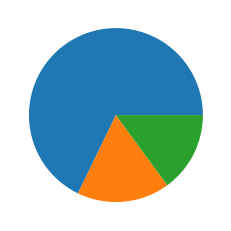

In [21]:
plt.pie(outliers.value_counts());

There are definitely some characters with an above average chance of winning as well as characters with a far below average chance of winning. So the game is definitely not PERFECTLY balanced, although most characters have average performance (within one standard deviation of the mean).

## Which stages are the most popular to play on? Which one should I pick?

In [22]:
games["stage"].value_counts()

Pokémon Stadium 2       518935
Small Battlefield       194543
Town & City             176540
Final Destination       171321
Battlefield             165034
Smashville              141531
Kalos Pokémon League     85734
Yoshi's Story            35656
Hollow Bastion           31653
Lylat Cruise              9037
Northern Cave             1441
Pokémon Stadium            592
                           343
Yoshi's Island             287
Unova Pokémon League        91
WarioWare                   67
Skyloft                     56
Frigate Orpheon             30
Yggdrasil's Altar           26
Castle Siege                18
Mementos                    14
Fountain of Dreams           3
Name: stage, dtype: int64

To find the best stage to pick, let's say we pick the 'best' character from our previous analysis and then find the best stage for that character

In [23]:
wins_per_stage = games[games["winner_char"] == top_ten.index[0]] \
    .groupby("stage")["winner_char"].count().sort_values(ascending=False)

loss_per_stage = games[games["loser_char"] == top_ten.index[0]] \
    .groupby("stage")["loser_char"].count().sort_values(ascending=False)

stage_win_ratio = wins_per_stage / (wins_per_stage + loss_per_stage)

Let's not account for massively underrepresented stages

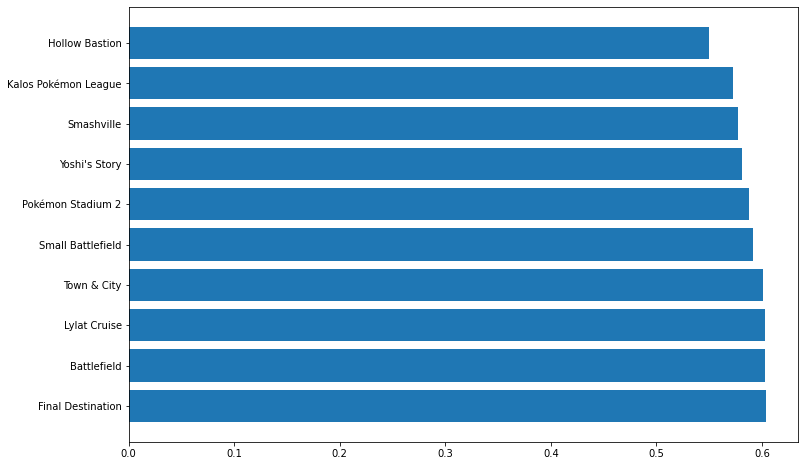

In [24]:
stage_win_ratio = stage_win_ratio[games["stage"].value_counts() > 5000]

plt.figure(figsize=(12,8))
plt.barh(stage_win_ratio.sort_values(ascending=False).index, stage_win_ratio.sort_values(ascending=False));

It seems that this character has the highest probability of winning on Final Destination, Battlefield and Lylat Cruise!

## Are there any trends in character popularity?

In [25]:
games["date"] = pd.to_datetime(games["date"])

wins_per_month = games.groupby([pd.Grouper(key="date", freq="M"), "winner_char"])["winner_char"].count()

wins_per_month = pd.DataFrame(wins_per_month)

wins_per_month.columns = ["win_count"]

In [26]:
wins_sorted = wins_per_month.sort_values(["date", "win_count"], ascending=[True, False]).unstack()

top_10 = wins_sorted.iloc[0].sort_values(ascending=False)[:10].index

share_of_wins = wins_sorted/wins_sorted.sum(axis=1)[:,None]

/tmp/ipykernel_21907/551080451.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  share_of_wins = wins_sorted/wins_sorted.sum(axis=1)[:,None]


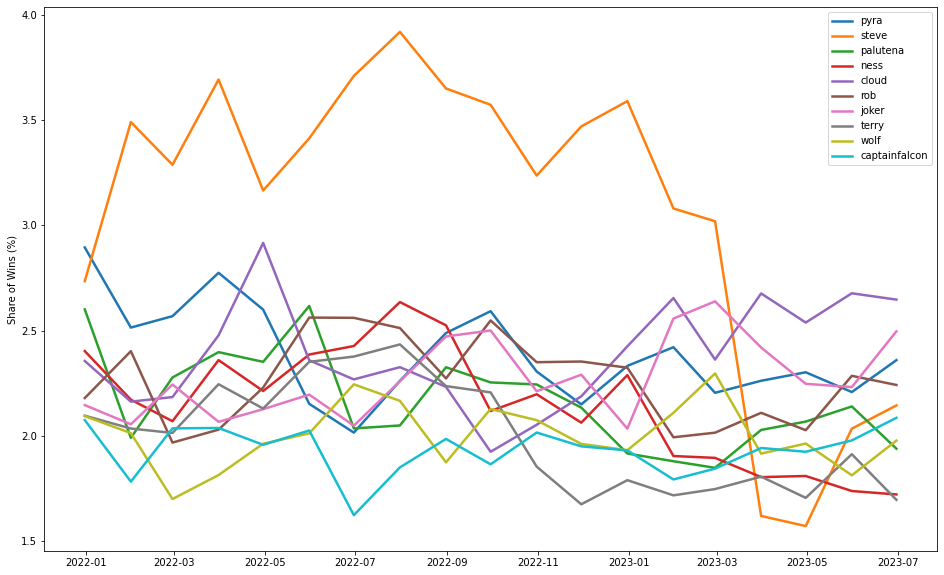

In [27]:
plt.figure(figsize=(16,10))
plt.plot(share_of_wins[top_10]*100, label=[el[1] for el in top_10], lw=2.5)
plt.ylabel("Share of Wins (%)")
plt.legend();

Main takeaways here is that recently Steve has lost his dominance. The character now accounts for a far larger share of wins than he used to have; a change which happened in just the past few months.

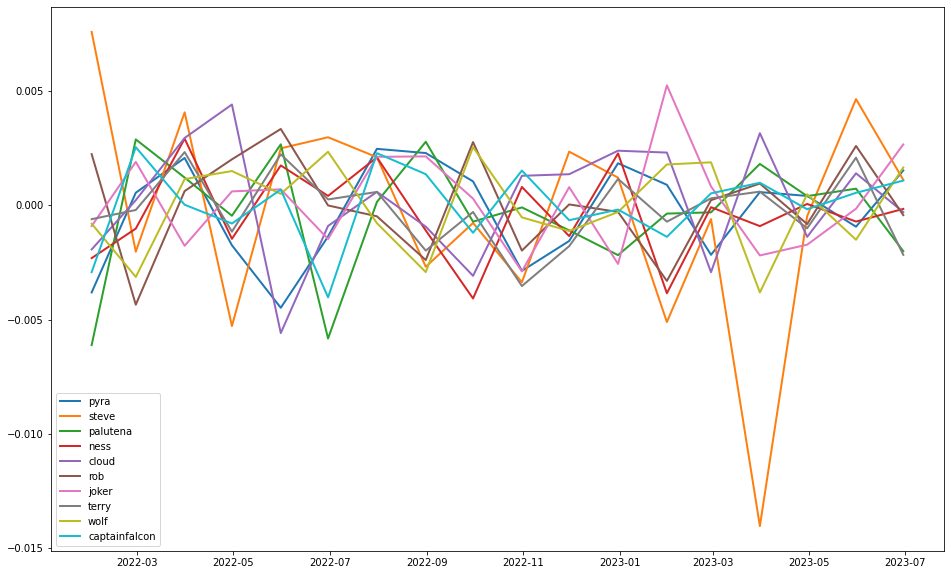

In [28]:
plt.figure(figsize=(16,10))
plt.plot(share_of_wins[top_10].diff(), label=[el[1] for el in top_10], lw=2)
plt.legend();

Illustrates Steve's massive drop in popularity in April.